In [3]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df_train = pd.read_csv("./input/train.csv")

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df_train.columns.size

81

In [17]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [18]:
# most expensive house price is about 180k $

180921000

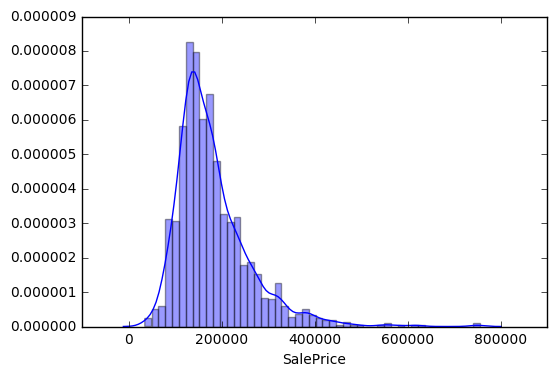

In [21]:
sns.distplot(df_train['SalePrice'])
# 아래 히스토그램 그림을 보면 정규 분포는 살짝 벗어나고 분명한 positive skewness (왼쪽으로 치우침)

In [22]:
# skewness and kurtosis
print("Skewness : %f" % df_train['SalePrice'].skew())
print("Kurtosis : %f" % df_train['SalePrice'].kurt())


Skewness : 1.882876
Kurtosis : 6.536282


In [25]:
var = 'GrLivArea'
df_train[var]
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)

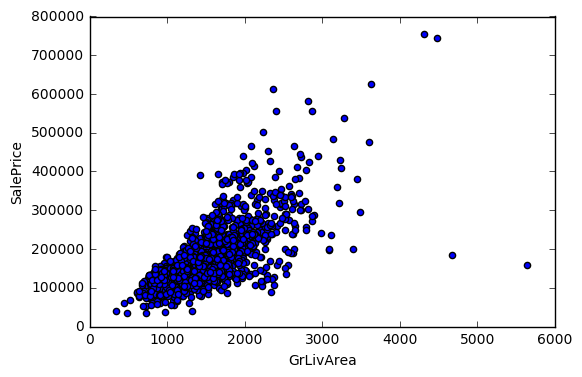

In [29]:
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

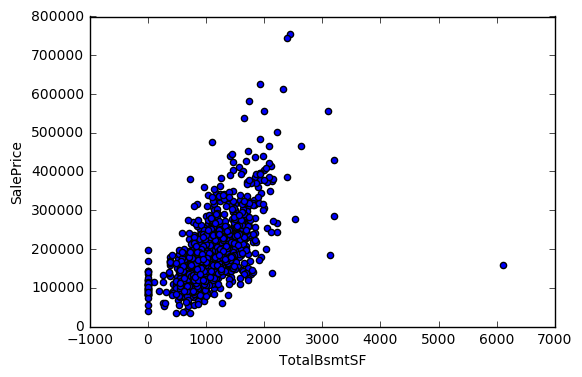

In [30]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

(-0.5, 9.5, 0, 800000)

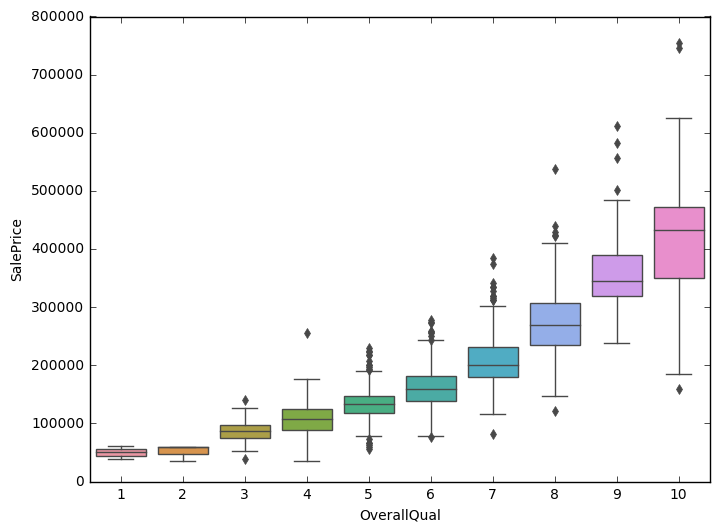

In [49]:
# 이제 분류범주의 피쳐를 들여다보자
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis= 1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

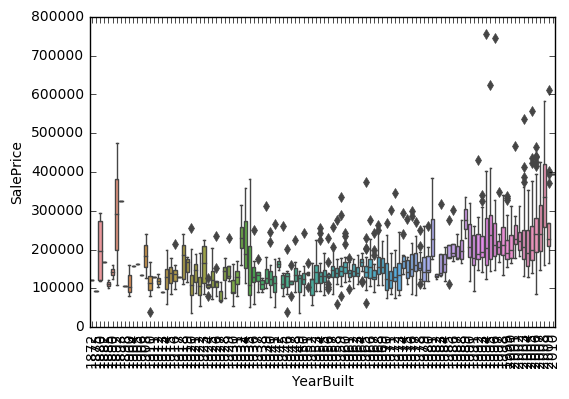

In [54]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
#f,ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

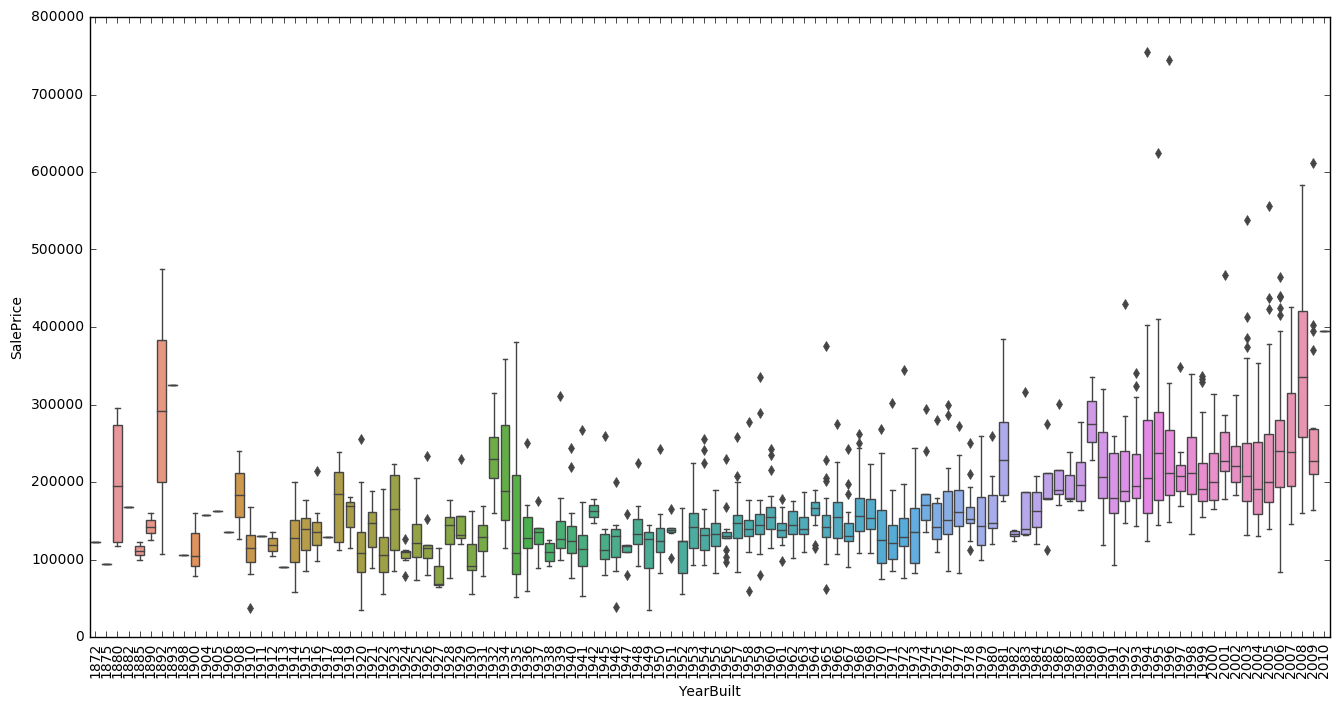

In [56]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f,ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

아파트가 무려 1872년도에 지은 아파트가 부동산에 나와있다는거 신기한듯 평균이 1971년도에 지은 아파트.. 한국에서 처음 지은 아파트가 아직 재건축되지 않았다면 최초의 아파트라는거.. 

여튼 이런 변수를 4개 살펴보았지만 let's separate the wheat from the chaff. 해보자고

In [61]:
df_train['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [72]:
# correlation matrix
corrmat = df_train.corr()
corrmat.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.022829,0.013228,0.165250,0.120411,0.260795,-0.025846,0.171217,0.177344,0.169392,0.132625,...,0.127875,0.140120,-0.027989,0.035447,0.056039,0.075679,0.024339,0.039160,0.013155,0.293053
std,0.164327,0.206872,0.217781,0.187661,0.283448,0.200596,0.299184,0.246353,0.214785,0.251963,...,0.184927,0.185041,0.196558,0.163405,0.167260,0.164106,0.164466,0.164511,0.168315,0.291845
min,-0.050298,-0.386347,-0.386347,-0.139781,-0.183882,-0.375983,-0.387268,-0.193919,-0.128101,-0.495251,...,-0.125989,-0.093079,-0.387268,-0.046635,-0.082864,-0.059689,-0.043080,-0.145721,-0.145721,-0.135907
25%,-0.018682,-0.055879,0.039197,0.007031,0.030935,-0.090699,-0.013391,0.007819,0.013491,-0.013051,...,0.002752,0.006882,-0.108229,-0.007664,-0.005747,0.009143,-0.020468,-0.006362,-0.028922,0.002612
50%,0.000392,-0.009860,0.112149,0.081223,0.245656,-0.039410,0.135533,0.123960,0.142710,0.089590,...,0.100123,0.118732,-0.026855,0.019609,0.042272,0.055623,-0.005018,0.021331,-0.013940,0.299982
75%,0.009940,0.038442,0.265772,0.178226,0.522412,0.025501,0.307277,0.275636,0.279719,0.238158,...,0.219864,0.223116,0.010304,0.034154,0.064170,0.080533,0.007060,0.036471,0.009883,0.518948
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


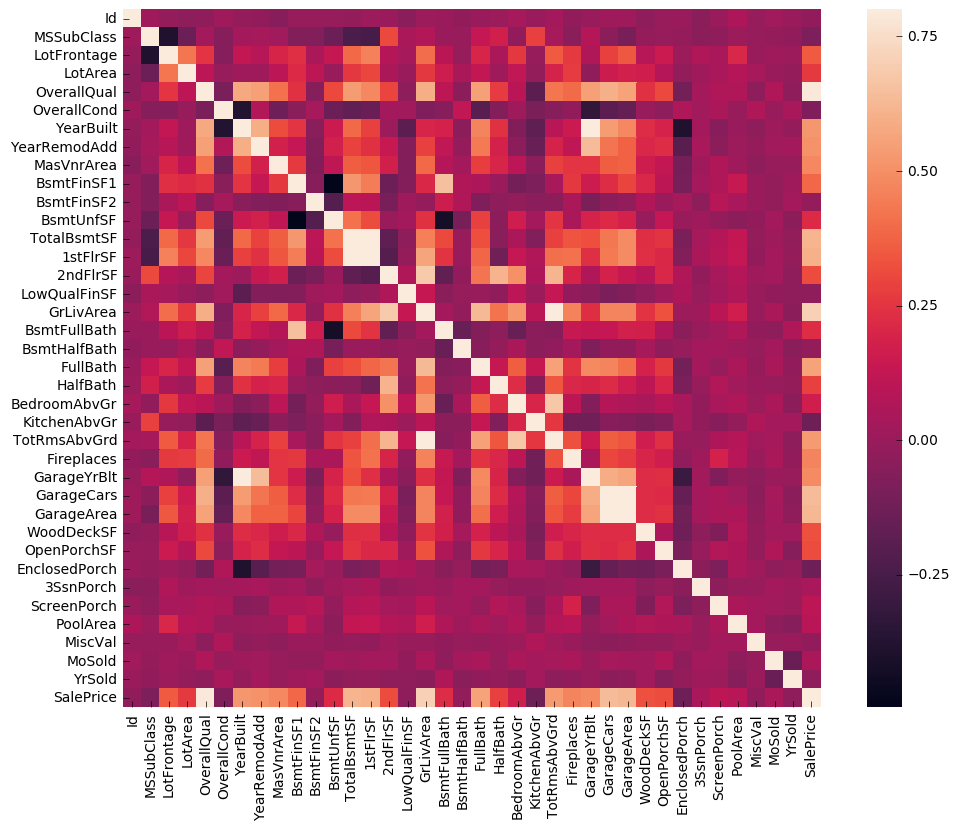

In [74]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [73]:
corrmat.size

1444

In [75]:
# saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

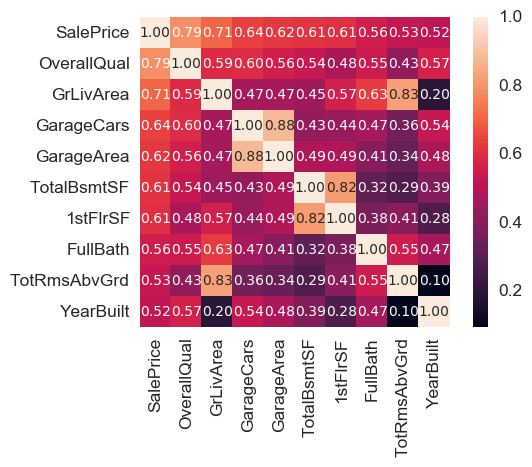

In [78]:
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', \
                 annot_kws={'size':10}, yticklabels=cols.values,\
                 xticklabels=cols.values)
plt.show()

여기에서 보면 GarageArea 와 GarageCars를 보면 원인>결과 느낌이라서 하나만 유지 GarageCars가 더 상관관계가 있으므로. TotalBsmtSF와 1stFLoor도 동일한 케이스므로 TotalBsmtSF 유지. 그리고 FullBath는 흠?? 그리고 YearBuilt같은 경우는 관련이 있어보이긴 한데 이건 시계열 분석이 들어가야할 거 같아 더 고민이 필요.

In [79]:
cols.values

array(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'], dtype=object)

In [110]:
sns.set()
cols  = cols - ['GarageArea','1stFloor','TotRmsAbvGrd','TotRmsAbvGrd','1stFlrSF']
print(cols)

Index(['FullBath', 'GarageCars', 'GrLivArea', 'OverallQual', 'SalePrice',
       'TotalBsmtSF', 'YearBuilt'],
      dtype='object')


In [111]:
cols.size

7

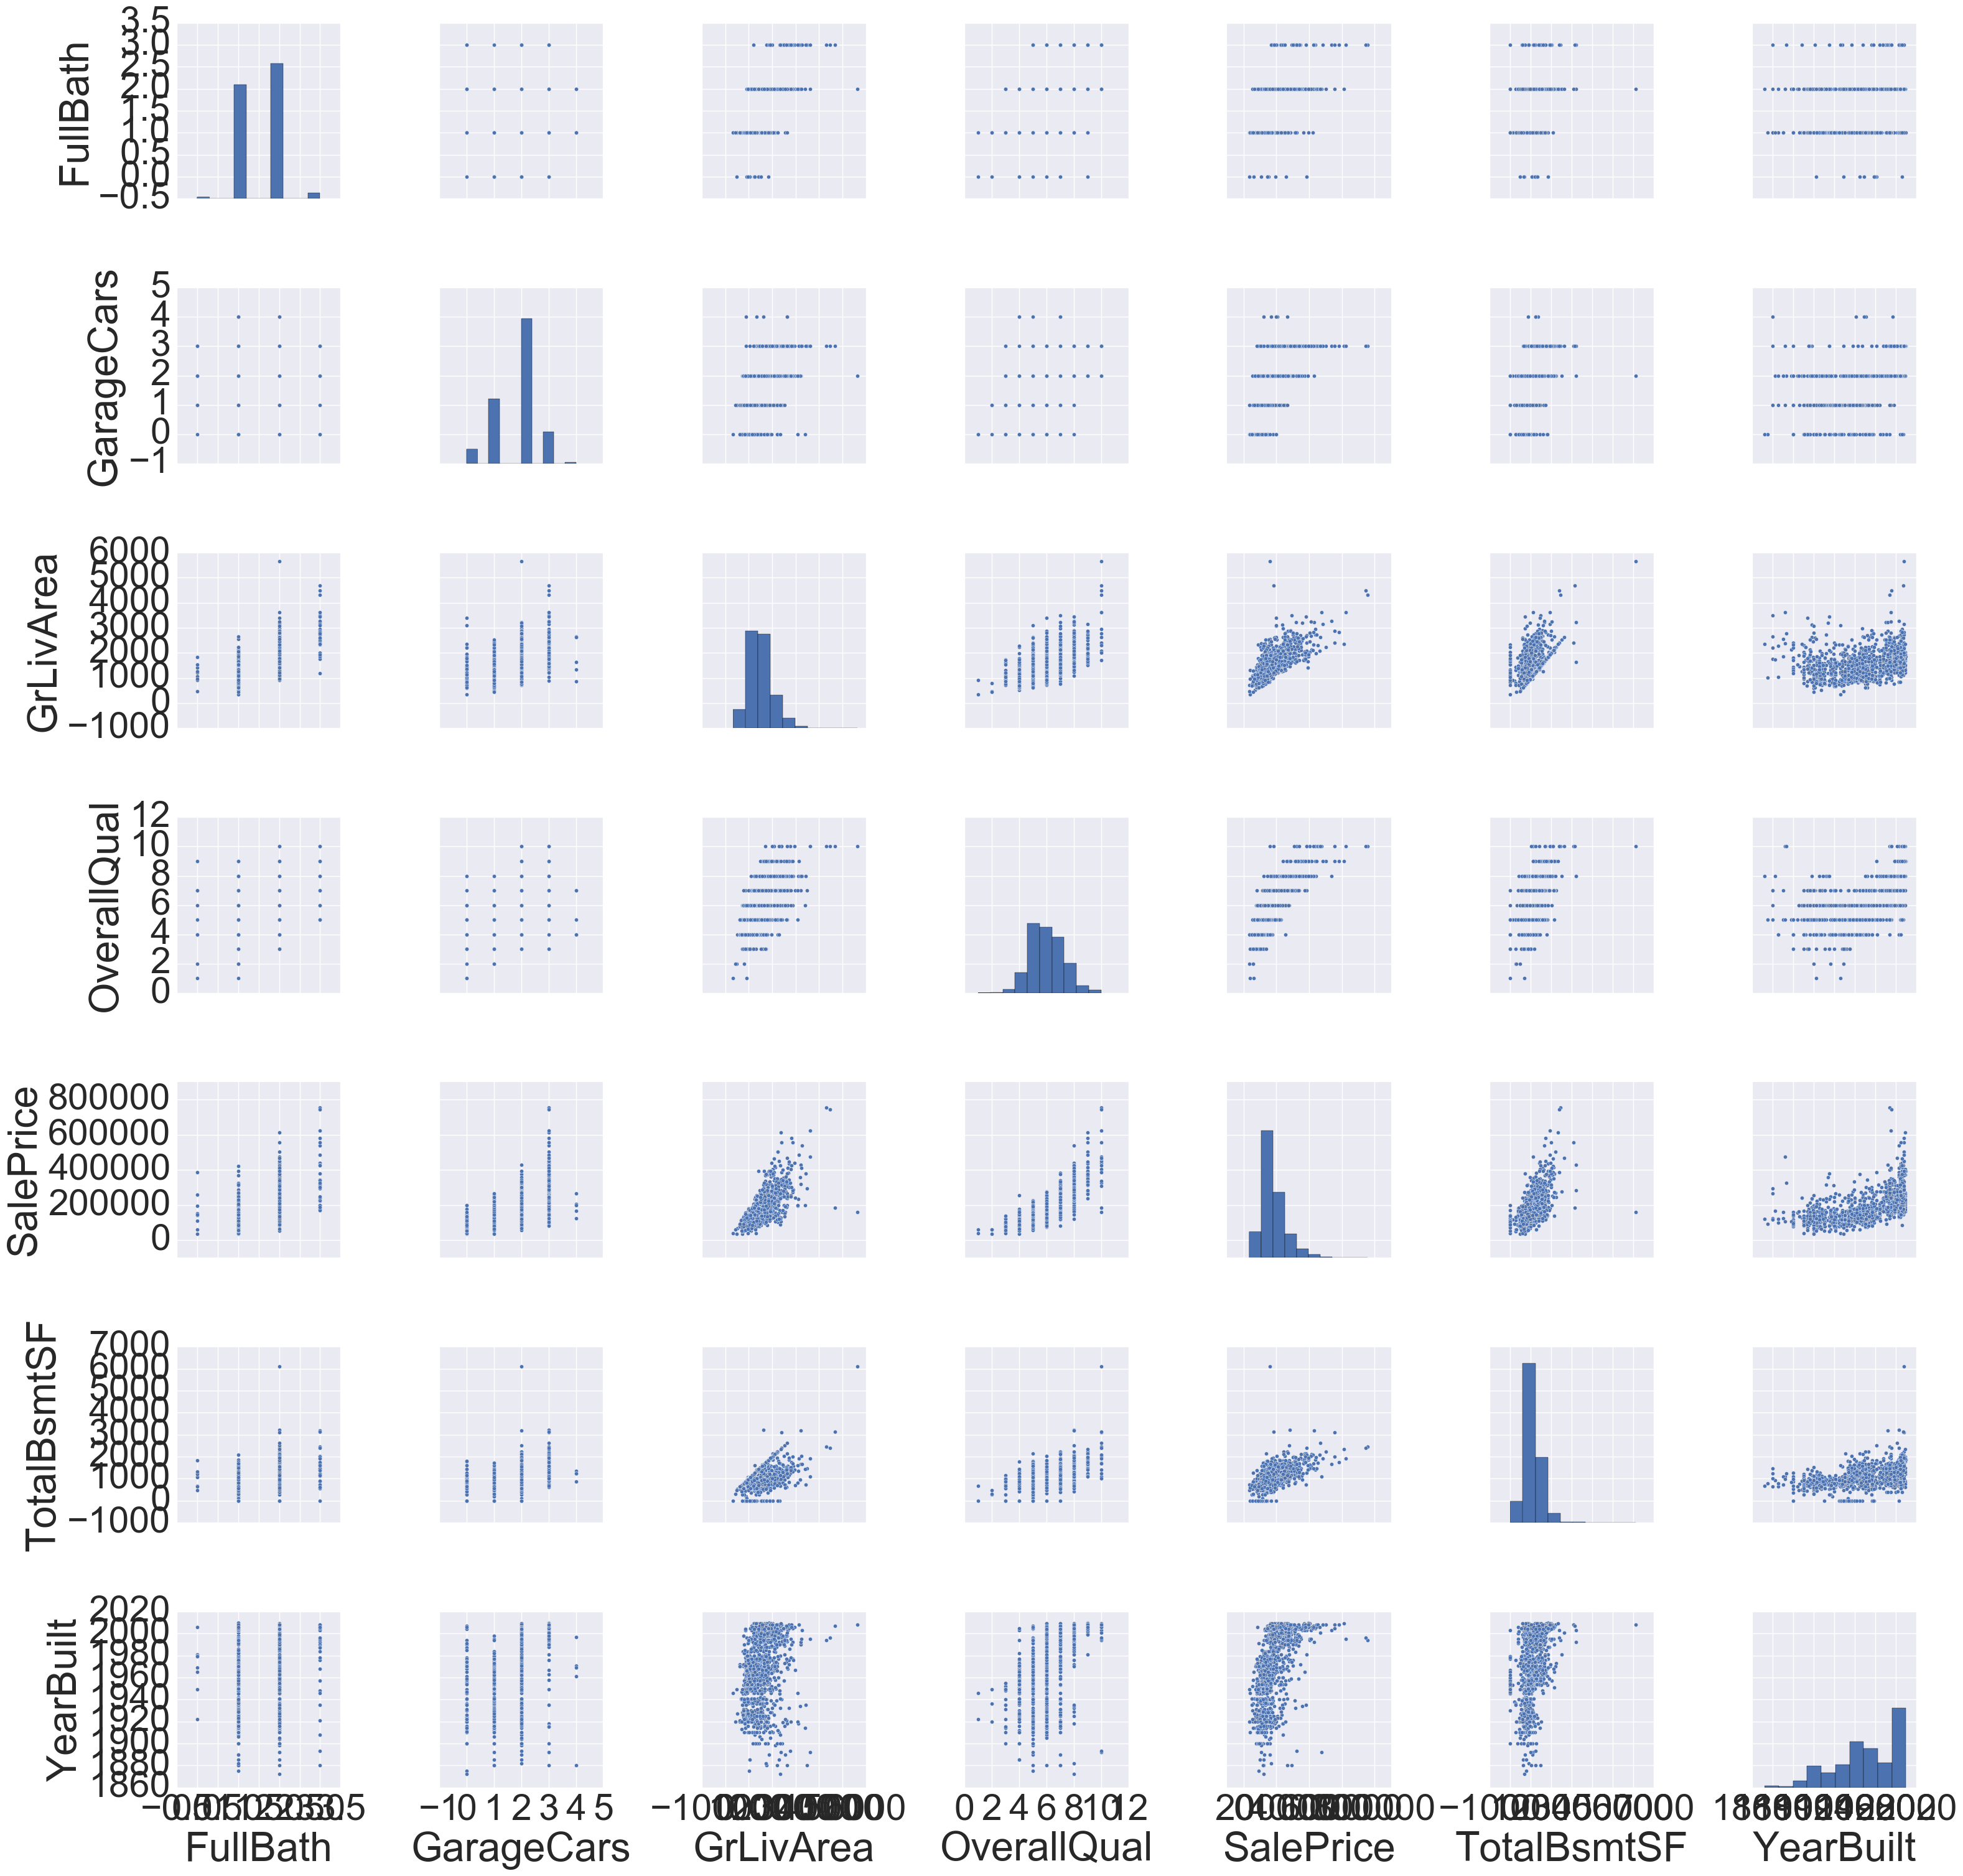

In [106]:
# r에서 graphics::pairs(~PIQ+Brain+Height+Weight, data=df, main="Scatterplot Matrix for Brain") 유사
sns.pairplot(df_train[cols], size=3.5)
#sns.set(font_scale=2.25)
plt.show()

여기에서 YearBuilt와 SalePrice의 관계를 보면 좀 exponential그래프가 생각나지 않는가?
그다음으로는 미싱데이터를 찾으러 가보자 

미싱데이터의 경우는 
어떻게 얼마나 미싱데이터가 많은지 데이터의 손실 정도를 체크하고 미싱 데이터에 대한 패턴을 파악해서
그 정도를 최소화 하는게 목표가 되겠다.

In [120]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
print(total.head())

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
dtype: int64


In [127]:
count = df_train.isnull().count()
print(count.head())

Id             1460
MSSubClass     1460
MSZoning       1460
LotFrontage    1460
LotArea        1460
dtype: int64


In [130]:
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


여기 미싱 데이터가 많은 컬럼 기준으로 내림차순 정렬해서 보면 통상 15프로 이하는 버리는걸로 생각하면
PoolQC, MiscFeature, Alle, Fence, FireplaceQu, LotFrontage정도는 깔끔하게 버려주고  Garage로 시작하는
모든 컬럼은 같은 missing value count를 가지고 있다. 100프로 같은 rows가 같이 없는 것일것이다. 그리고 
이 데이터는 5프로 정도 소실이 있지만 걍 GarageCar를 대표변수로 세울꺼기 때문에 걍 다 날리자. 마찬가지로 
Bsmt로 시작하는 변수 또한 2.5프로 정도 손실이 있어 사용가능하지만 TotalBsmtSF를 세울꺼라 걍 날리자!
마지막으로 YearBuilt/OverallQual과 MasVnrArea/MasVnrType의 상관관계가 강하다고? ㅇ

